In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

%matplotlib inline

In [2]:
raw_data = pd.read_csv("./1023_raw_data.csv", encoding = "utf-8")

In [3]:
raw_data

,date,time,speed,ldws,lkas
0,2020-10-23,14:51:28,28.0,0,0
1,2020-10-23,14:51:29,27.0,0,1
2,2020-10-23,14:51:30,27.0,0,1
3,2020-10-23,14:51:31,28.0,0,1
4,2020-10-23,14:51:32,29.0,0,1
...,...,...,...,...,...
1841,2020-10-23,15:31:22,71.0,0,1
1842,2020-10-23,15:31:23,73.0,0,1
1843,2020-10-23,15:31:24,79.0,0,0
1844,2020-10-23,15:31:25,85.0,0,0


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1846 non-null   object 
 1   time    1846 non-null   object 
 2   speed   1644 non-null   float64
 3   ldws    1846 non-null   int64  
 4   lkas    1846 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 72.2+ KB


In [5]:
raw_data.isnull().sum()

date       0
time       0
speed    202
ldws       0
lkas       0
dtype: int64

In [6]:
inter_data = raw_data.interpolate()

In [7]:
inter_data = inter_data.astype({'speed' : 'int'})
print(inter_data.dtypes)

date     object
time     object
speed     int32
ldws      int64
lkas      int64
dtype: object


In [8]:
inter_data.isnull().sum()

date     0
time     0
speed    0
ldws     0
lkas     0
dtype: int64

In [9]:
# pro_data['speed'].plot(color='#ff0000')
# plt.grid()
# plt.legend()
# plt.title("speed graph")
# plt.xlabel("time")
# plt.ylabel("speed")

# plt.show()

In [10]:
inter_data.head()

,date,time,speed,ldws,lkas
0,2020-10-23,14:51:28,28,0,0
1,2020-10-23,14:51:29,27,0,1
2,2020-10-23,14:51:30,27,0,1
3,2020-10-23,14:51:31,28,0,1
4,2020-10-23,14:51:32,29,0,1


In [11]:
inter_data["date"] =  pd.to_datetime(inter_data["date"]).dt.strftime("%Y%m%d")
inter_data["time"] =  pd.to_datetime(inter_data["time"]).dt.strftime("%H%M%S")
inter_data

,date,time,speed,ldws,lkas
0,20201023,145128,28,0,0
1,20201023,145129,27,0,1
2,20201023,145130,27,0,1
3,20201023,145131,28,0,1
4,20201023,145132,29,0,1
...,...,...,...,...,...
1841,20201023,153122,71,0,1
1842,20201023,153123,73,0,1
1843,20201023,153124,79,0,0
1844,20201023,153125,85,0,0


In [12]:
inter_data = inter_data.astype('int64')
inter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   date    1846 non-null   int64
 1   time    1846 non-null   int64
 2   speed   1846 non-null   int64
 3   ldws    1846 non-null   int64
 4   lkas    1846 non-null   int64
dtypes: int64(5)
memory usage: 72.2 KB


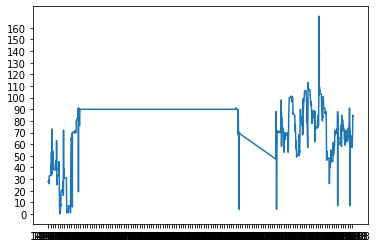

In [13]:
x = inter_data.time
y = inter_data.speed


# plt.figure(figsize=(, 10))
plt.xticks(range(min(x), max(x), 60))
plt.yticks(range(min(y), max(y), 10))
plt.plot(x, y)

In [14]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1846 non-null   object 
 1   time    1846 non-null   object 
 2   speed   1644 non-null   float64
 3   ldws    1846 non-null   int64  
 4   lkas    1846 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 72.2+ KB


In [15]:
inter_data['speed']

0       28
1       27
2       27
3       28
4       29
        ..
1841    71
1842    73
1843    79
1844    85
1845    84
Name: speed, Length: 1846, dtype: int64

In [16]:
fill_data = raw_data.fillna(method='ffill')
fill_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1846 non-null   object 
 1   time    1846 non-null   object 
 2   speed   1846 non-null   float64
 3   ldws    1846 non-null   int64  
 4   lkas    1846 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 72.2+ KB


In [17]:
fill_data = fill_data.astype({'speed' : 'int'})
print(fill_data.dtypes)

date     object
time     object
speed     int32
ldws      int64
lkas      int64
dtype: object


In [18]:
fill_data["date"] =  pd.to_datetime(fill_data["date"]).dt.strftime("%Y%m%d")
fill_data["time"] =  pd.to_datetime(fill_data["time"]).dt.strftime("%H%M%S")
fill_data

,date,time,speed,ldws,lkas
0,20201023,145128,28,0,0
1,20201023,145129,27,0,1
2,20201023,145130,27,0,1
3,20201023,145131,28,0,1
4,20201023,145132,29,0,1
...,...,...,...,...,...
1841,20201023,153122,71,0,1
1842,20201023,153123,73,0,1
1843,20201023,153124,79,0,0
1844,20201023,153125,85,0,0


In [19]:
# inter_data.to_csv("./1023_inter_data.csv", index=False)

In [20]:
# fill_data.to_csv("./1023_ffill_data.csv", index=False)